In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel('datasett.xlsx')


In [3]:
# Handling missing data before processing (simple fill with median for demonstration)
data.fillna(data.median(), inplace=True)


C:\Users\adity\AppData\Local\Temp\ipykernel_25596\3434676853.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [4]:
# Helper function to apply K-means clustering and visualize the results
def cluster_and_visualize(data, column_name, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data[f'{column_name}_cluster'] = kmeans.fit_predict(data[[column_name]].dropna())
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=column_name, hue=f'{column_name}_cluster', element='step', palette='viridis', bins=30)
    plt.title(f'{column_name} Distribution by Cluster')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster')
    plt.show()

In [5]:
# Define attributes and their clusters
attributes = {
    'Age': 3, 'Income': 3, 'Credit Score': 3,
    'Number of Defaults': 5, 'Number of Late Payments': 5,
    'Number of Social Media Connections': 3
}

In [6]:
# Assign scores to categorical data directly
categorical_data = {
    'Employment Status': {'Employed': 10, 'Retired': 20, 'Self-Employed': 30},
    'Education Level': {'Bachelor': 10, 'Master': 20, 'High School': 30, 'PhD': 5},
    'Typing Speed': {'Normal': 10, 'Fast': 20},
    'Scroll Speed': {'Normal': 10, 'Fast': 20},
    'IP Change Frequency': {'Low': 10, 'High': 30}
}

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


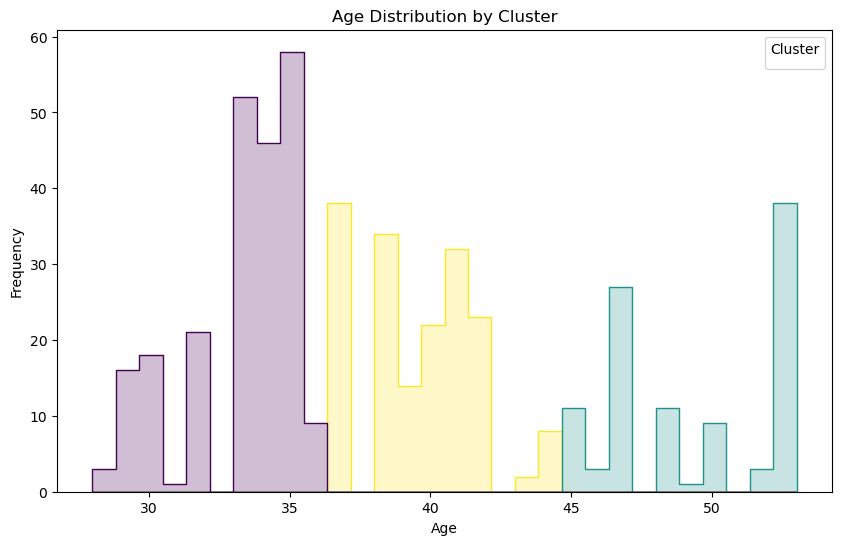

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


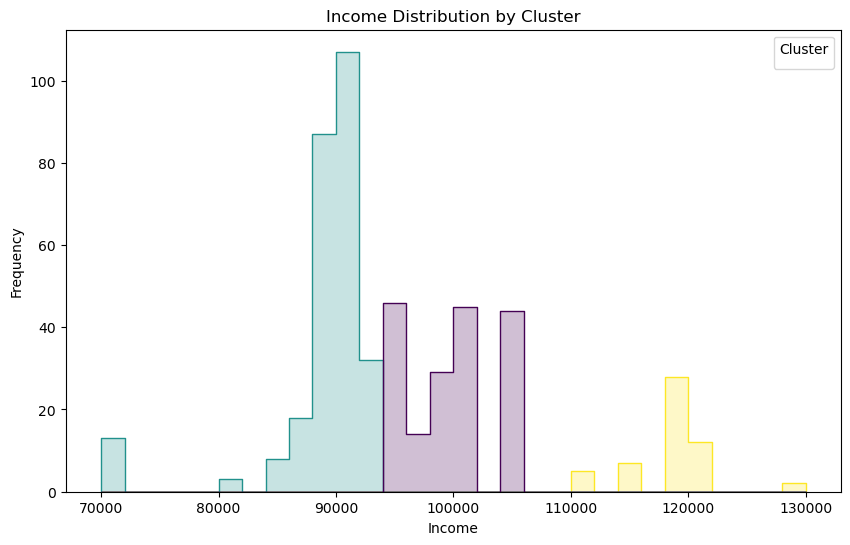

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


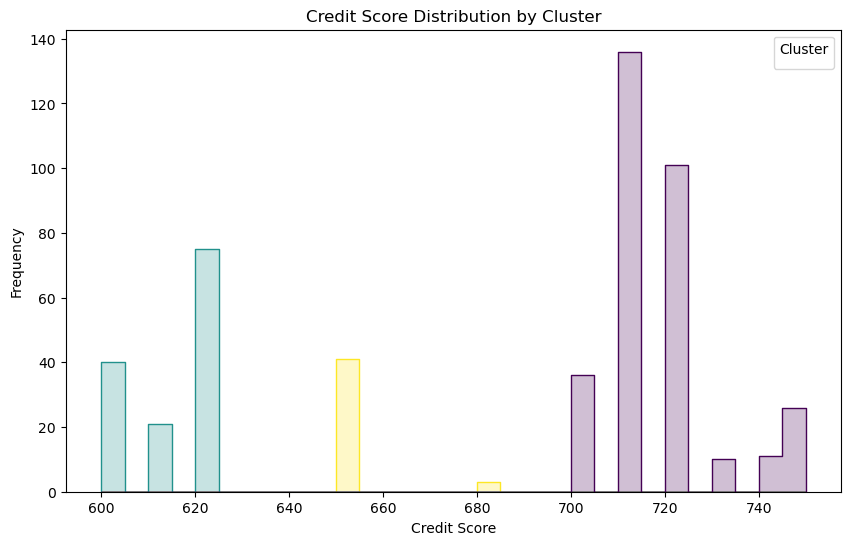

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


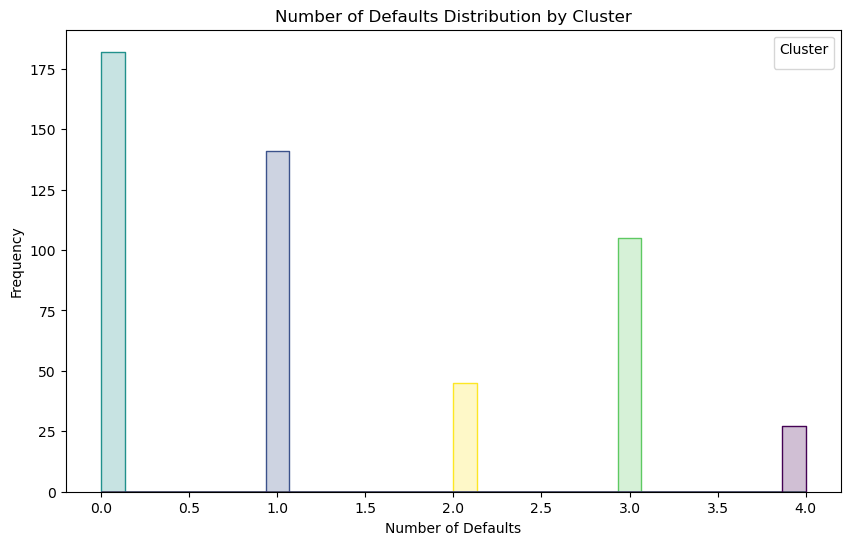

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


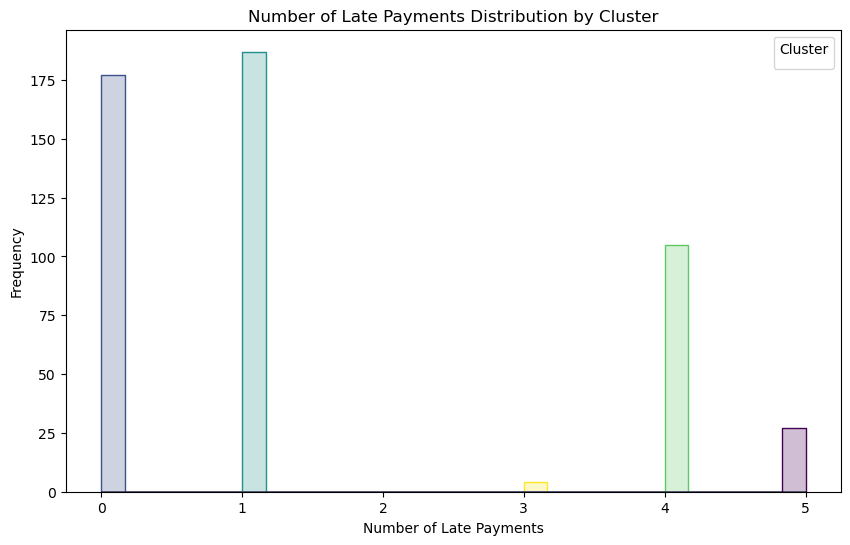

C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


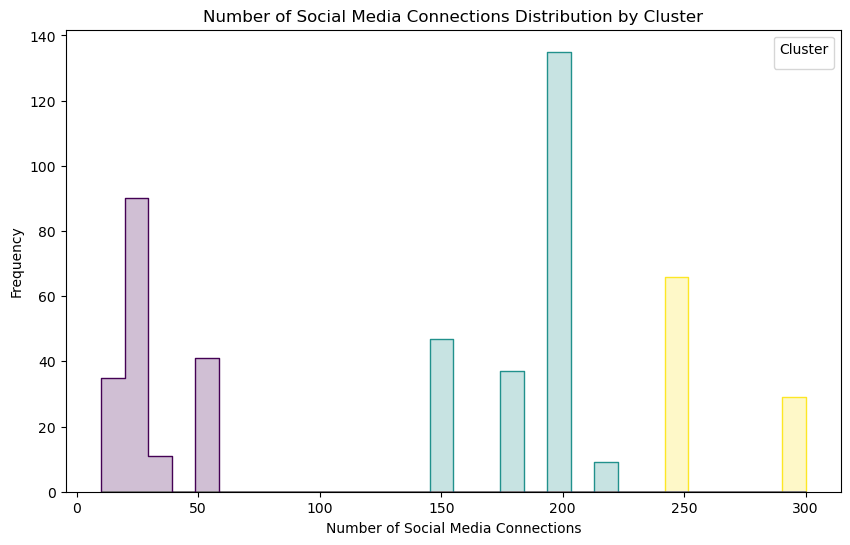

In [7]:
# Cluster continuous attributes
for attribute, clusters in attributes.items():
    if attribute in data.columns:
        cluster_and_visualize(data, attribute, n_clusters=clusters)


In [8]:
# Helper function to visualize categorical results
def visualize_categorical(data, column_name, score_map):
    # Map scores to categories for visualization
    data[f'{column_name}_score'] = data[column_name].map(score_map)
    
    # Visualize the scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y=f'{column_name}_score', data=data, palette='viridis')
    plt.title(f'{column_name} Scores')
    plt.xlabel(column_name)
    plt.ylabel('Score')
    plt.show()

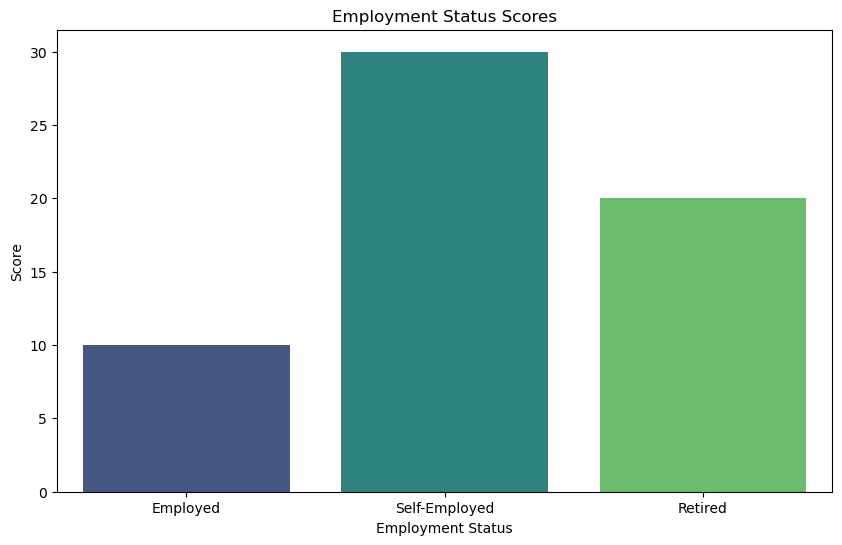

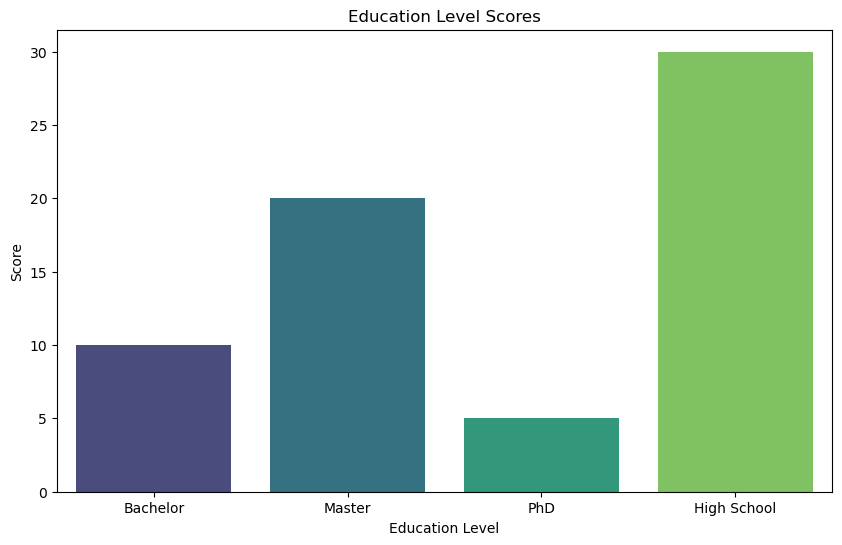

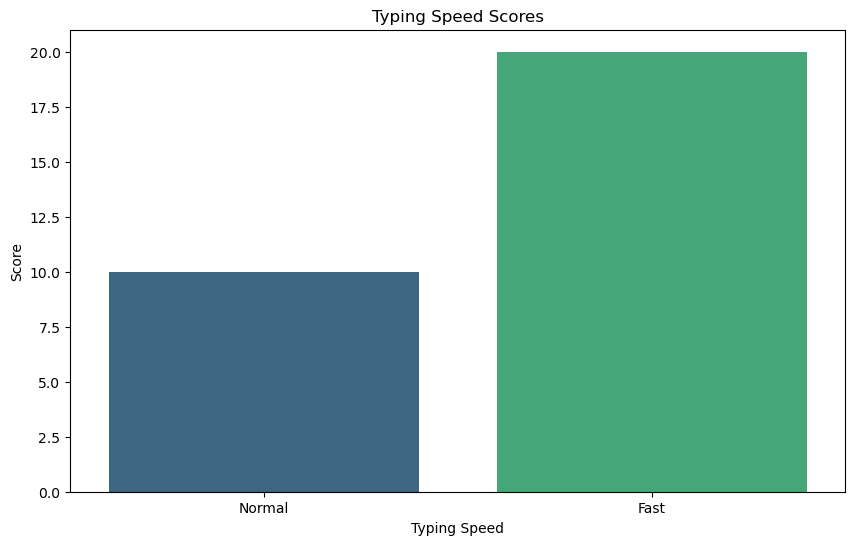

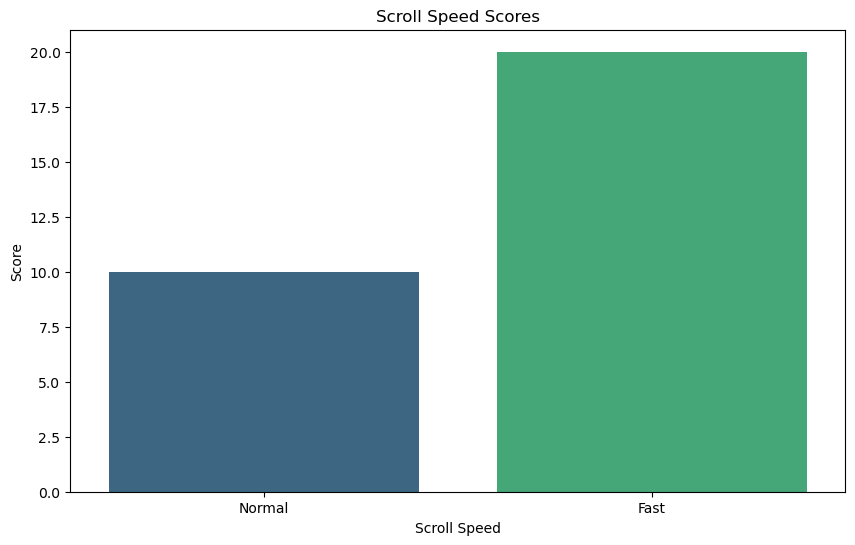

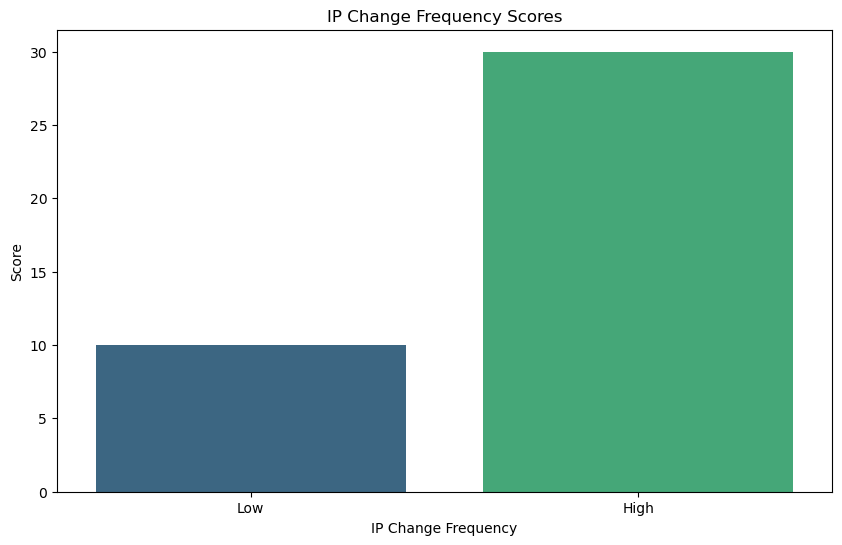

In [9]:
# Visualize categorical attributes
for category, scores in categorical_data.items():
    visualize_categorical(data, category, scores)

In [10]:
# Assign initial scores for clusters
cluster_scores = {
    'Age': {0: 10, 1: 20, 2: 30},
    'Income': {0: 10, 1: 20, 2: 30},
    'Credit Score': {0: 10, 1: 20, 2: 30},
    'Number of Defaults': {0: 10, 1: 20, 2: 30, 3: 40, 4: 50},
    'Number of Late Payments': {0: 10, 1: 20, 2: 30, 3: 40, 4: 50},
    'Number of Social Media Connections': {0: 10, 1: 20, 2: 30}
}

In [11]:
def map_data(data):
    # Simulate mapping string categories to the expected cluster keys
    data['Employment Status_cluster'] = data['Employment Status'].map({'Employed': 0, 'Retired': 1, 'Self-Employed': 2})
    data['Education Level_cluster'] = data['Education Level'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})
    data['Typing Speed_cluster'] = data['Typing Speed'].map({'Normal': 0, 'Fast': 1})
    data['Scroll Speed_cluster'] = data['Scroll Speed'].map({'Normal': 0, 'Fast': 1})
    data['IP Change Frequency_cluster'] = data['IP Change Frequency'].map({'Low': 0, 'High': 1})
    return data

In [12]:
# Prepare your data
data = map_data(data)  

# Update the scoring system if necessary
cluster_scores.update({
    'Employment Status': {0: 10, 1: 20, 2: 30},
    'Education Level': {0: 10, 1: 20, 2: 30, 3: 40},
    'Typing Speed': {0: 10, 1: 20},
    'Scroll Speed': {0: 10, 1: 20},
    'IP Change Frequency': {0: 10, 1: 30}
})

In [13]:
# Define weightages for attributes based on their potential impact on fraud detection
attribute_weightages = {
    'Age': 0.1, 'Income': 0.2, 'Credit Score': 0.3,
    'Number of Defaults': 0.1, 'Number of Late Payments': 0.1,
    'Employment Status': 0.05, 'Education Level': 0.05,
    'Typing Speed': 0.05, 'Scroll Speed': 0.05, 'IP Change Frequency': 0.05,
    'Number of Social Media Connections': 0.1
}

In [14]:
# Adjusted calculate_scaled_risk_scores function
def calculate_scaled_risk_scores(data, cluster_scores, attribute_weightages):
    risk_scores = pd.DataFrame()
    for attribute, scores in cluster_scores.items():
        cluster_col = f'{attribute}_cluster'
        if cluster_col in data.columns:
            data[f'{attribute}_risk_score'] = data[cluster_col].map(scores).fillna(0)
            risk_scores[f'{attribute}_risk_score'] = data[f'{attribute}_risk_score'] * attribute_weightages[attribute]
        else:
            risk_scores[f'{attribute}_risk_score'] = 0  # Default to 0 if no data available

    # Combine and scale risk scores
    risk_scores['total_risk_score'] = risk_scores.sum(axis=1)
    scaler = MinMaxScaler(feature_range=(350, 1000))
    risk_scores['scaled_risk_score'] = scaler.fit_transform(risk_scores[['total_risk_score']])
    
    return risk_scores


In [15]:
# Calculate and display risk scores
risk_scores = calculate_scaled_risk_scores(data, cluster_scores, attribute_weightages)
print(risk_scores.head())

   Age_risk_score  Income_risk_score  Credit Score_risk_score  \
0             2.0                4.0                      3.0   
1             1.0                2.0                      9.0   
2             2.0                6.0                      3.0   
3             1.0                4.0                      6.0   
4             3.0                6.0                      3.0   

   Number of Defaults_risk_score  Number of Late Payments_risk_score  \
0                            3.0                                 3.0   
1                            2.0                                 2.0   
2                            3.0                                 2.0   
3                            5.0                                 5.0   
4                            3.0                                 3.0   

   Number of Social Media Connections_risk_score  \
0                                            2.0   
1                                            2.0   
2                   

In [16]:
# Add decision suggestions based on risk scores
def decision_suggestions(risk_scores):
    conditions = [
        (risk_scores['scaled_risk_score'] <= 600),
        (risk_scores['scaled_risk_score'] > 600) & (risk_scores['scaled_risk_score'] <= 800),
        (risk_scores['scaled_risk_score'] > 800)
    ]
    choices = ['Accepted', 'Suspicious', 'Declined']
    risk_scores['decision'] = np.select(conditions, choices, default='Review')

    return risk_scores

# Apply decision suggestions
final_scores = decision_suggestions(risk_scores)
final_scores.head()

,Age_risk_score,Income_risk_score,Credit Score_risk_score,Number of Defaults_risk_score,Number of Late Payments_risk_score,Number of Social Media Connections_risk_score,Employment Status_risk_score,Education Level_risk_score,Typing Speed_risk_score,Scroll Speed_risk_score,IP Change Frequency_risk_score,total_risk_score,scaled_risk_score,decision
0,2.0,4.0,3.0,3.0,3.0,2.0,0.5,1.0,0.5,0.5,0.5,20.0,527.272727,Accepted
1,1.0,2.0,9.0,2.0,2.0,2.0,0.5,1.5,0.5,0.5,0.5,21.5,615.909091,Suspicious
2,2.0,6.0,3.0,3.0,2.0,3.0,0.5,2.0,0.5,0.5,0.5,23.0,704.545455,Suspicious
3,1.0,4.0,6.0,5.0,5.0,1.0,1.5,1.0,1.0,1.0,1.5,28.0,1000.000000,Declined
4,3.0,6.0,3.0,3.0,3.0,2.0,0.5,2.0,0.5,0.5,0.5,24.0,763.636364,Suspicious


In [18]:
final_scores.to_excel('final_fraud_risk_detection.xlsx', index=False)